In [46]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

In [47]:
df=pd.read_csv('/kaggle/input/walmart-sales-forecast/features.csv')
stores=pd.read_csv('/kaggle/input/walmart-sales-forecast/stores.csv')
train=pd.read_csv('/kaggle/input/walmart-sales-forecast/train.csv')
test=pd.read_csv('/kaggle/input/walmart-sales-forecast/test.csv')
df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis =1 , inplace = True )
merged_df = df.merge(stores, on='Store', how='left')
merged_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,NaN,NaN,False,B,118221
8186,45,2013-07-05,77.50,3.614,NaN,NaN,False,B,118221
8187,45,2013-07-12,79.37,3.614,NaN,NaN,False,B,118221
8188,45,2013-07-19,82.84,3.737,NaN,NaN,False,B,118221


In [48]:
train_merged = train.merge(merged_df, on=['Store', 'Date', 'IsHoliday'], how='left')
test_merged = test.merge(merged_df, on=['Store', 'Date', 'IsHoliday'], how='left')
df=train_merged
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667,B,118221


In [49]:
df['IsHoliday'] = df['IsHoliday'].map({True: 1, False: 0})
df['Type'].value_counts()

Type
A    215478
B    163495
C     42597
Name: count, dtype: int64

In [50]:
df['Type'] = df['Type'].map({'A': 1, 'B': 2,'C' :3})

In [51]:
df['Date']=pd.to_datetime(df['Date'])
df. isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [52]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,1,151315
1,1,1,2010-02-12,46039.49,1,38.51,2.548,211.242170,8.106,1,151315
2,1,1,2010-02-19,41595.55,0,39.93,2.514,211.289143,8.106,1,151315
3,1,1,2010-02-26,19403.54,0,46.63,2.561,211.319643,8.106,1,151315
4,1,1,2010-03-05,21827.90,0,46.50,2.625,211.350143,8.106,1,151315
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,64.88,3.997,192.013558,8.684,2,118221
421566,45,98,2012-10-05,628.10,0,64.89,3.985,192.170412,8.667,2,118221
421567,45,98,2012-10-12,1061.02,0,54.47,4.000,192.327265,8.667,2,118221
421568,45,98,2012-10-19,760.01,0,56.47,3.969,192.330854,8.667,2,118221


In [53]:
df['day']=df.Date.dt.day
df['month']=df.Date.dt.month
df['year']=df.Date.dt.year
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,day,month,year
0,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,1,151315,5,2,2010
1,1,1,2010-02-12,46039.49,1,38.51,2.548,211.242170,8.106,1,151315,12,2,2010
2,1,1,2010-02-19,41595.55,0,39.93,2.514,211.289143,8.106,1,151315,19,2,2010
3,1,1,2010-02-26,19403.54,0,46.63,2.561,211.319643,8.106,1,151315,26,2,2010
4,1,1,2010-03-05,21827.90,0,46.50,2.625,211.350143,8.106,1,151315,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,64.88,3.997,192.013558,8.684,2,118221,28,9,2012
421566,45,98,2012-10-05,628.10,0,64.89,3.985,192.170412,8.667,2,118221,5,10,2012
421567,45,98,2012-10-12,1061.02,0,54.47,4.000,192.327265,8.667,2,118221,12,10,2012
421568,45,98,2012-10-19,760.01,0,56.47,3.969,192.330854,8.667,2,118221,19,10,2012


In [54]:
df.set_index(df['Date'],inplace=True)
df.drop( 'Date',axis=1 , inplace =True)
df

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,day,month,year
Date,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,0,42.31,2.572,211.096358,8.106,1,151315,5,2,2010
2010-02-12,1,1,46039.49,1,38.51,2.548,211.242170,8.106,1,151315,12,2,2010
2010-02-19,1,1,41595.55,0,39.93,2.514,211.289143,8.106,1,151315,19,2,2010
2010-02-26,1,1,19403.54,0,46.63,2.561,211.319643,8.106,1,151315,26,2,2010
2010-03-05,1,1,21827.90,0,46.50,2.625,211.350143,8.106,1,151315,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,45,98,508.37,0,64.88,3.997,192.013558,8.684,2,118221,28,9,2012
2012-10-05,45,98,628.10,0,64.89,3.985,192.170412,8.667,2,118221,5,10,2012
2012-10-12,45,98,1061.02,0,54.47,4.000,192.327265,8.667,2,118221,12,10,2012


In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
IsHoliday,421570.0,0.070358,0.255750,0.000,0.000000,0.00000,0.000000,1.000000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
CPI,421570.0,171.201947,39.159276,126.064,132.022667,182.31878,212.416993,227.232807
Unemployment,421570.0,7.960289,1.863296,3.879,6.891000,7.86600,8.572000,14.313000
Type,421570.0,1.589912,0.666337,1.000,1.000000,1.00000,2.000000,3.000000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.00000,202505.000000,219622.000000


<Axes: >

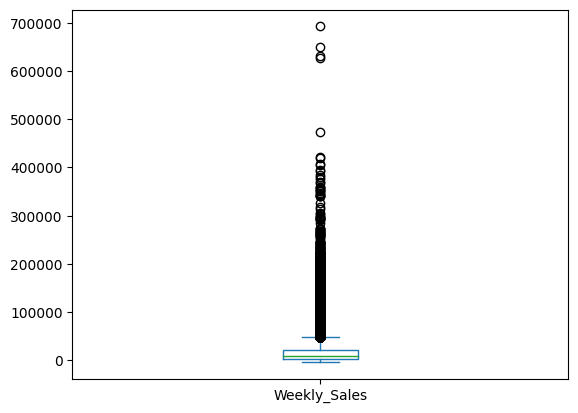

In [56]:
import matplotlib.pyplot as plt
df['Weekly_Sales'].plot(kind='box')

In [57]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

outliers = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Get rows where outliers exist
    outlier_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers[col] = {
        "Total Outliers": outlier_rows.shape[0],
        "Percentage": round(100 * outlier_rows.shape[0] / df.shape[0], 2)
    }


pd.DataFrame(outliers).T.sort_values(by="Total Outliers", ascending=False)

,Total Outliers,Percentage
Weekly_Sales,35521.0,8.43
Unemployment,32114.0,7.62
IsHoliday,29661.0,7.04
Temperature,69.0,0.02
Store,0.0,0.00
Dept,0.0,0.00
Fuel_Price,0.0,0.00
CPI,0.0,0.00
Type,0.0,0.00
Size,0.0,0.00


In [58]:
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['Weekly_Sales'] >= lower) & (df['Weekly_Sales'] <= upper)]


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 386049 entries, 2010-02-05 to 2012-10-26
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         386049 non-null  int64  
 1   Dept          386049 non-null  int64  
 2   Weekly_Sales  386049 non-null  float64
 3   IsHoliday     386049 non-null  int64  
 4   Temperature   386049 non-null  float64
 5   Fuel_Price    386049 non-null  float64
 6   CPI           386049 non-null  float64
 7   Unemployment  386049 non-null  float64
 8   Type          386049 non-null  int64  
 9   Size          386049 non-null  int64  
 10  day           386049 non-null  int32  
 11  month         386049 non-null  int32  
 12  year          386049 non-null  int32  
dtypes: float64(5), int32(3), int64(5)
memory usage: 36.8 MB


In [60]:
x=df.drop('Weekly_Sales',axis=1)
y=df['Weekly_Sales']

modeling 


In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8 ,random_state=42)

In [63]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error




model = XGBRegressor(n_estimators=100, verbosity=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f'XGBoost  - MSE: {mse:.2f}')
r2 = r2_score(y_test, y_pred)
print(f'XGBoost - R2 Score: {r2:.2f}')

XGBoost  - MSE: 9637620.04
XGBoost - R2 Score: 0.93


scaling data

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
X_train_scaled= scaler_X.fit_transform(x_train)
X_test_scaled = scaler_X.transform(x_test)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.to_numpy().reshape(-1, 1))

In [66]:
model = XGBRegressor(n_estimators=100, verbosity=0)
model.fit(X_train_scaled, y_train_scaled)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
print(f'XGBoost  - MSE: {mse:.2f}')
r2 = r2_score(y_test_scaled, y_pred)
print(f'XGBoost - R2 Score: {r2:.2f}')

XGBoost  - MSE: 0.00
XGBoost - R2 Score: 0.93


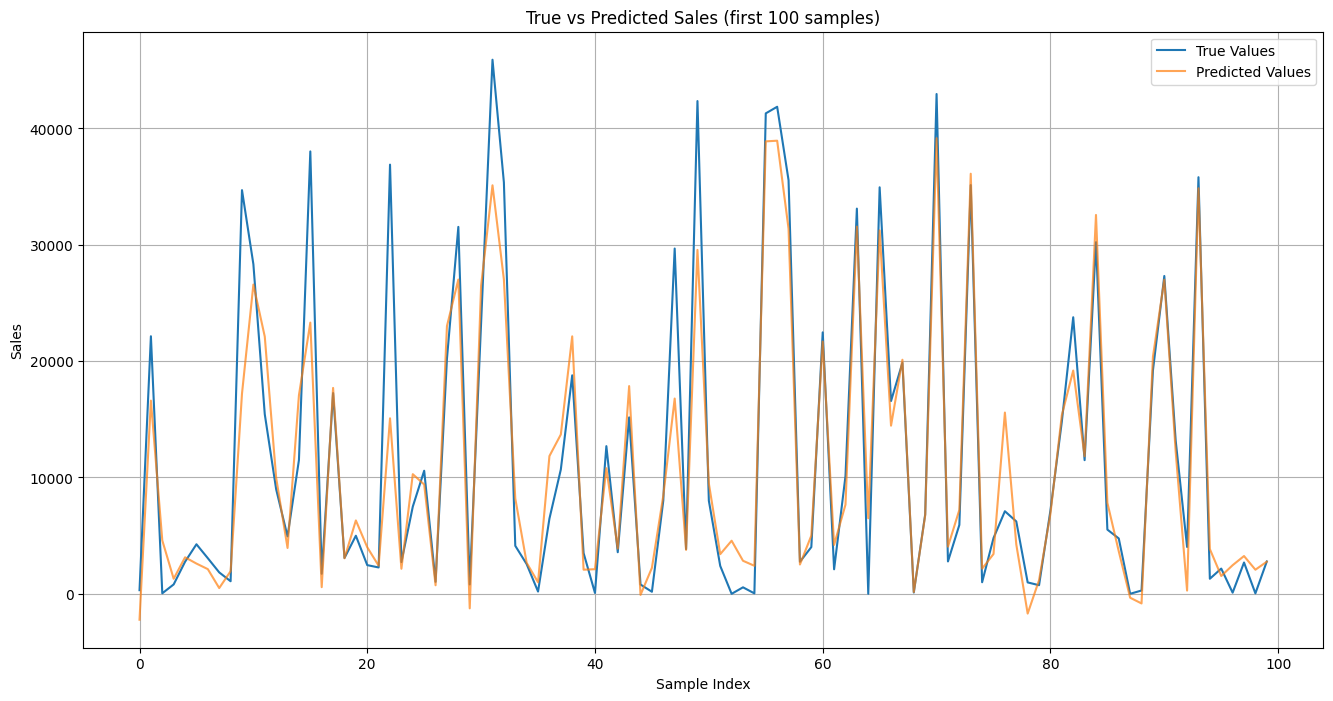

In [67]:
y_pred_scaled = model.predict(X_test_scaled)

y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_test_actual = scaler_y.inverse_transform(y_test_scaled).ravel()

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.plot(y_test_actual[:100], label='True Values')         
plt.plot(y_pred[:100], label='Predicted Values', alpha=0.7)
plt.title('True vs Predicted Sales (first 100 samples)')
plt.xlabel('Sample Index')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

using ANN

In [68]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense , Input 

Dmodel = Sequential([
    Dense(16,activation = 'relu', input_dim=12),
    Dense(8,activation = 'relu',),
    Dense(8,activation = 'relu'),
    Dense(1,activation = 'linear')
                    ]


) 

Dmodel.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
Dmodel.summary()

2025-07-28 05:55:49.501171: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753682149.705588      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753682149.763186      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-28 05:56:02.938814: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 425 (1.66 KB)

 Trainable params: 425 (1.66 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
history=Dmodel.fit(X_train_scaled,y_train_scaled,epochs=30, validation_split=0.2)

Epoch 1/30
7721/7721 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.0409 - mae: 0.1520 - val_loss: 0.0349 - val_mae: 0.1355
Epoch 2/30
7721/7721 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0345 - mae: 0.1361 - val_loss: 0.0347 - val_mae: 0.1418
Epoch 3/30
7721/7721 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0339 - mae: 0.1346 - val_loss: 0.0342 - val_mae: 0.1406
Epoch 4/30
7721/7721 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0332 - mae: 0.1333 - val_loss: 0.0332 - val_mae: 0.1354
Epoch 5/30
7721/7721 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0325 - mae: 0.1312 - val_loss: 0.0327 - val_mae: 0.1321
Epoch 6/30
7721/7721 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0324 - mae: 0.1312 - val_loss: 0.0321 - val_mae: 0.1335
Epoch 7/30
7721/7721 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0319 - mae: 0.1299 - val_loss: 0.0325 - val_mae: 0.1290
Epoch 8/30
7721/7721 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0316 - mae: 0.1291 - val_loss: 0.0319 - val_mae: 0.1252
Epoch 9/30
7721/7721 ━━━━━━━━━━━

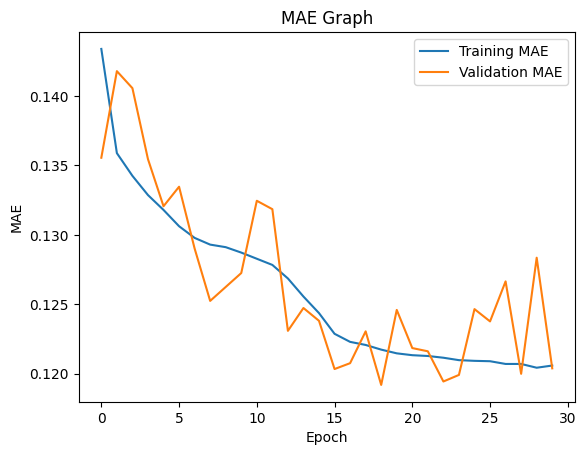

In [70]:
# Plot training loss
plt.plot(history.history["mae"], label="Training MAE")

# Plot validation loss
plt.plot(history.history["val_mae"], label="Validation MAE")

# Add title and labels
plt.title("MAE Graph")
plt.xlabel("Epoch")  # Fixed here!
plt.ylabel("MAE")   # And here!

# Add legend
plt.legend()

# Show the plot
plt.show()

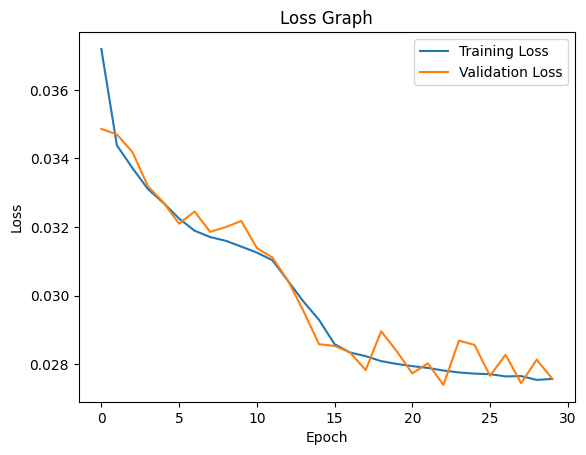

In [71]:
# Plot training loss
plt.plot(history.history["loss"], label="Training Loss")

# Plot validation loss
plt.plot(history.history["val_loss"], label="Validation Loss")

# Add title and labels
plt.title("Loss Graph")
plt.xlabel("Epoch")  # Fixed here!
plt.ylabel("Loss")   # And here!

# Add legend
plt.legend()

# Show the plot
plt.show()

In [72]:
# Assuming y_pred is your predicted values from model.predict(X_test_scaled)
y_pred = model.predict(X_test_scaled)  # Replace with your prediction step if different


In [73]:
r2 = r2_score(y_test_scaled, y_pred)
print(f'ANN - R2 Score: {r2:.2f}')

ANN - R2 Score: 0.93


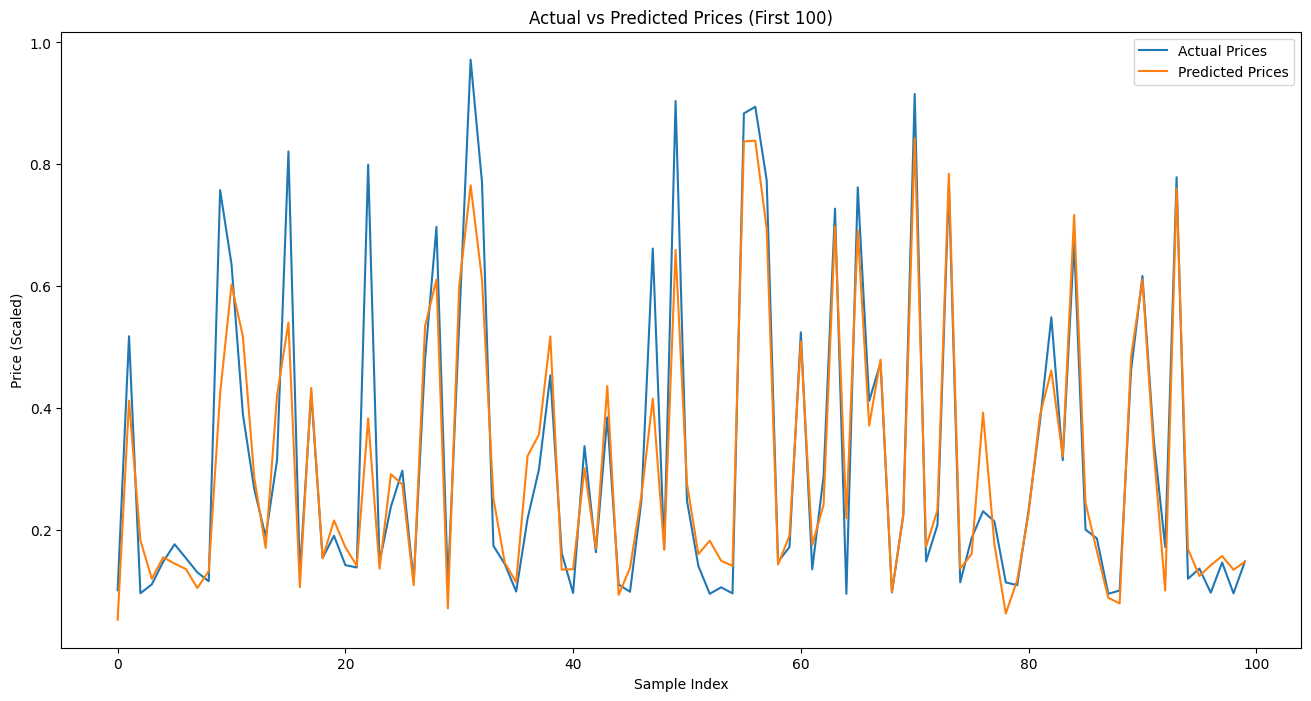

In [74]:
plt.figure(figsize=(16, 8))
# Plot actual prices for first 100 samples
plt.plot(y_test_scaled[:100], label="Actual Prices")

# Plot predicted prices for first 100 samples
plt.plot(y_pred[:100], label="Predicted Prices")

# Add title and labels
plt.title("Actual vs Predicted Prices (First 100)")
plt.xlabel("Sample Index")
plt.ylabel("Price (Scaled)")

# Add legend
plt.legend()

# Show the plot
plt.show()